In [ ]:
import numpy as np
import math 
from scipy.spatial.distance import cdist

In [ ]:
Data_points = [[3, 5], [4, 6], [2, 8], [2, 3], [1, 4]]
ClusterCenter =[[2, 4], [1, 7]]
q=2
lamda=1

In [ ]:
def CalculateDisance(Data_points,ClusterCenter) :
   c1= ClusterCenter[0]
   c2= ClusterCenter[1]
   x=[]
   y=[]
   i=0
 
   while i < len(Data_points) :
    d1= math.dist(Data_points[i], c1)
    d2= math.dist(Data_points[i], c2)
    x.append(d1)
    y.append(d2)
    i=i+1
   array=[[x[0], y[0]], [x[1], y[1]], [x[2], y[2]], [x[3], y[3]], [x[4], y[4]]] 
   return array

d=CalculateDisance(Data_points,ClusterCenter)
d

[[1.4142135623730951, 2.8284271247461903],
 [2.8284271247461903, 3.1622776601683795],
 [4.0, 1.4142135623730951],
 [1.0, 4.123105625617661],
 [1.0, 3.0]]

In [ ]:
def CalculateMembership(CalculateDisanceOutput, q ):
  power=2/(q-1)
  i=0
  j=0
  p=0
  m=0
  r1=[]
  r2=[]
  for i in range(len(Data_points)):
    m1=pow((CalculateDisanceOutput[i][0]/CalculateDisanceOutput[i][0]),power)
    m2=pow((CalculateDisanceOutput[i][0]/CalculateDisanceOutput[i][1]),power)
    m=m1+m2
    rnk1=1/m
    r1.append(rnk1)
  for j in range(len(Data_points)):
    p1=pow((CalculateDisanceOutput[j][1]/CalculateDisanceOutput[j][0]),power)
    p2=pow((CalculateDisanceOutput[j][1]/CalculateDisanceOutput[j][1]),power)
    p=p1+p2
    rnk2=1/p  
    r2.append(rnk2)
  rnk=[[r1[0], r2[0]], [r1[1], r2[1]], [r1[2], r2[2]], [r1[3], r2[3]], [r1[4], r2[4]]]
  return rnk
x=CalculateMembership(d,q) 
x


[[0.8, 0.2],
 [0.5555555555555556, 0.4444444444444444],
 [0.11111111111111113, 0.8888888888888888],
 [0.9444444444444444, 0.05555555555555555],
 [0.8999999999999999, 0.1]]

In [ ]:
def UpdateClusterMean(CalculateMembershipOutput, dataPoint,Q ):
  i=0
  p1=0
  part1=0
  part2=0
  part11=0
  part22=0
  p11=0
  p2=0
  p22=0
  cluster1=[]
  cluster2=[]
  points= np.array(dataPoint)
  array=np.array(CalculateMembershipOutput)
  while i < len(Data_points): 
   part1=((pow(array[i][0],Q))*points[i])
   p1=p1+part1
   part2=( pow(array[i][0],Q))
   p2=p2+part2
   p=p1/p2
   cluster1.append(p)

   part11=((pow(array[i][1],Q))*points[i])
   p11=p11+part11
   part22=( pow(array[i][1],Q) )
   p22=p22+part22
   pp=p11/p22
   cluster2.append(pp)
   i=i+1
    
  cluster=[ [p[0], p[1]], [pp[0], pp[1]]]
  return cluster
  
  
clusterMean= UpdateClusterMean(x,Data_points,q)
clusterMean
 



[[2.1679647658785353, 4.155725544738062],
 [2.4084223013048636, 7.451838671411625]]

In [ ]:
from re import S
def CalculateObjectiveFunc(dataPoints,membership, clusterCenters, Q,lamda):
  distance=CalculateDisance(dataPoints,clusterCenters)
  rnk=membership
  i=0
  j=0
  k=0
  cluster1=0
  cluster2=0
  sumC1=0
  sumC2=0
  part1=0
  partFinal=0
  while i < len(Data_points): 
    cluster1=pow(rnk[i][0],Q)*pow(d[i][0],2)
    sumC1=sumC1+cluster1
    i=i+1

  while j < len(Data_points): 
    cluster1=pow(rnk[j][1],Q)*pow(d[j][1],2)
    sumC2=sumC2+cluster1
    j=j+1
  part1=sumC1+sumC2

  while k < len(Data_points): 

    part2=lamda*((rnk[k][0]+rnk[k][1])-1)
    k=k+1
  partFinal=part1+part2
  return partFinal
s=CalculateObjectiveFunc(Data_points,x, ClusterCenter, q,lamda) 
s

9.666666666666668

In [ ]:
def ReachConvergence(dataPoints,membership, clusterCenters, Q,lamda ) :
 obj0=CalculateObjectiveFunc(dataPoints,membership, clusterCenters, Q,lamda)
 array1=[obj0]
 newClustersArray=[]
 i=0
 while (True):
  newCenter=UpdateClusterMean(membership, Data_points,q )
  newClustersArray.append(newCenter)


  newDistance=CalculateDisance(Data_points,newCenter)
  newMem=CalculateMembership(newDistance, Q )

  Obj=CalculateObjectiveFunc(Data_points,newMem, newCenter, q,lamda)
  array1.append(Obj)

  diff=Obj-array1[i] 
  i=i+1

  membership=newMem
  

  if(diff<0.01): 
    #This is the new centers 
    print(newCenter)
    print(membership)

    break
  #return newCenter +membership
jj=ReachConvergence(Data_points,x, ClusterCenter, q,lamda )
jj 

[[1.6548335087226005, 3.685574952892563], [3.021742428474376, 6.61534506850486]]
[[0.4245669518565545, 0.5754330481434455], [0.10955025480160868, 0.8904497451983913], [0.13649584406480475, 0.8635041559351953], [0.9599320106657733, 0.04006798933422674], [0.9539359686533766, 0.046064031346623374]]


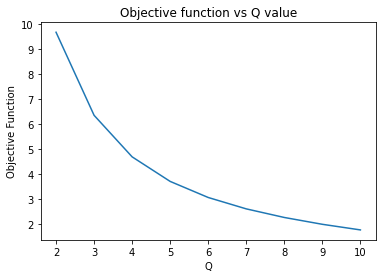

Q of 10 is the best q as it minimizes the objective function the most


In [ ]:
import matplotlib.pyplot as plt
q2= CalculateObjectiveFunc(Data_points,x,ClusterCenter,2,lamda)
q3= CalculateObjectiveFunc(Data_points,x,ClusterCenter,3,lamda)
q4= CalculateObjectiveFunc(Data_points,x,ClusterCenter,4,lamda)
q5= CalculateObjectiveFunc(Data_points,x,ClusterCenter,5,lamda)
q6= CalculateObjectiveFunc(Data_points,x,ClusterCenter,6,lamda)
q7= CalculateObjectiveFunc(Data_points,x,ClusterCenter,7,lamda)
q8= CalculateObjectiveFunc(Data_points,x,ClusterCenter,8,lamda)
q9= CalculateObjectiveFunc(Data_points,x,ClusterCenter,9,lamda)
q10= CalculateObjectiveFunc(Data_points,x,ClusterCenter,10,lamda)

Q = [2,3,4,5,6,7,8,9,10]
objectiveFunctionn = [q2,q3,q4,q5,q6,q7,q8,q9,q10]

 
plt.plot(Q, objectiveFunctionn)
plt.title('Objective function vs Q value')
plt.xlabel('Q')
plt.ylabel('Objective Function')
plt.show()
print("Q of 10 is the best q as it minimizes the objective function the most")